In [10]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

 Рассмотрим матрицу
\begin{equation}
A = 
\begin{Vmatrix}
0 & 1\\
0 & 0
\end{Vmatrix}
\end{equation}

Найти спектр матрицы A. Пусть $\sigma_{\epsilon}$ множество комплексных чисел z, что z является собственным значением матрицы $A + \delta A$ с некоторым $||\delta A||_2 < \epsilon $. Изобразите  $\sigma_{0.1}$ и $\sigma_{0.01}$ 

 Матрица А имеет вид жордановой клетки, поэтому ее собственные числа - 0. Характеристическое уравнение
\begin{equation}
det(A-\lambda E) = \lambda ^2 = 0 
\end{equation}


Условие задачи эквивалентно 
\begin{equation}
||(A - z E )^{-1} ||_2 \geq \epsilon^{-1}
\end{equation}
\begin{equation}
||(A - z E )^{-1} ||_2 = \sqrt{   \lambda_{max} ( (A^* - z^* E)^{-1} (A-zE)^{-1} )   }
\end{equation}
\begin{equation}
(A - z E )^{-1} =
\begin{Vmatrix}
-1/z & -1/z^2 \\
0 & -1/z
\end{Vmatrix}
\end{equation}
\begin{equation}
(A^* - z^* E)^{-1} (A-zE)^{-1} ) = 
\begin{Vmatrix}
-1/z^* & 0 \\
-1/z^{*2} & -1/z^*
\end{Vmatrix}
\begin{Vmatrix}
-1/z & -1/z^2 \\
0 & -1/z
\end{Vmatrix} =
\begin{Vmatrix}
1/|z|^2 & 1/|z|^2 z\\
1/|z|^2 z^* & 1/|z|^4 + 1/|z|^2
\end{Vmatrix}
\end{equation}

Характеристическое уравнение
\begin{equation}
\lambda^2 - (1/|z|^4 + 2/|z|^2 ) \lambda + 1/|z|^4 = 
\end{equation}
Максимальное собственное значение
\begin{equation}
\lambda = \frac{1/|z|^4 + 2/|z|^2 + \sqrt{1/|z|^8 + 4/|z|^6}}{2}
\end{equation}

Уравнение, определяющее область $\sigma_{\epsilon}$
\begin{equation}
\sqrt{1 + 2|z|^2 + \sqrt{1+4|z|^4}} > \sqrt{2}|z|^2 / \epsilon
\end{equation}
В качестве численного решения используем метод Ньютона:
\begin{gather}
t_{k+1} = t_k - f(t_k)/f'(t_k)\\
f(t) = 1 + 2 t + \sqrt{1+4t} - \frac{2 t^2}{\epsilon^2} \\
f'(t) = 2 + \frac{2}{\sqrt{1+4t}} - \frac{4 t}{\epsilon^2}
\end{gather}
Предельная точка $ t^* = |z|_{max}^2 $, начальная точка $t_0 = max(\epsilon, \epsilon^2)$ 

In [7]:
def f(x, epsilon):
  return 1 + 2*x + np.sqrt(1+4*x) - 2*(x/epsilon)**2
def der(x,epsilon):
  return 2 + 2/np.sqrt(1+4*x) - 4*x / (epsilon**2)

0.1
0.10050126889040527
0.1004987562746575
Радиус множества = 0.1005


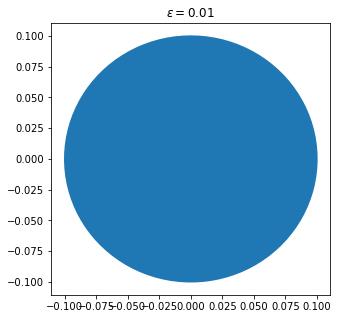

In [8]:
eps = 0.01
t = max(eps,eps**2)
for i in range(20):
  s = t - f(t,eps)/der(t,eps)
  print(np.sqrt(t))
  if (np.abs(np.sqrt(s/t) - 1)<0.00001):
    break
  t = s
t = s
import matplotlib.pyplot as plt

fi = np.linspace(0, 2*np.pi, 100)

x = np.sqrt(t)*np.sin(fi)
y = np.sqrt(t)*np.cos(fi)

fig, ax = plt.subplots(figsize=(5,5))
ax.fill(x, y)
ax.set_title(r"$\epsilon=$"+f"{eps}")

print("Радиус множества = "+f"{np.sqrt(t).round(5)}")

0.31622776601683794
0.3324967603438706
0.3316647747400709
Радиус множества = 0.33166


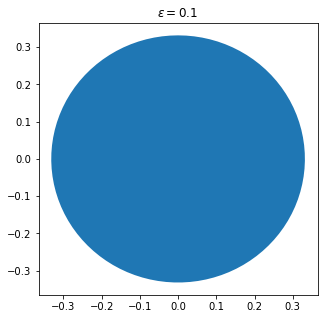

In [9]:
eps = 0.1
t = max(eps,eps**2)
for i in range(20):
  s = t - f(t,eps)/der(t,eps)
  print(np.sqrt(t))
  if (np.abs(np.sqrt(s/t) - 1)<0.00001):
    break
  t = s
t = s
import matplotlib.pyplot as plt

fi = np.linspace(0, 2*np.pi, 100)

x = np.sqrt(t)*np.sin(fi)
y = np.sqrt(t)*np.cos(fi)

fig, ax = plt.subplots(figsize=(5,5))
ax.fill(x, y)
ax.set_title(r"$\epsilon=$"+f"{eps}")

print("Радиус множества = "+f"{np.sqrt(t).round(5)}")